In [156]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-

Settings

train = 0 </br>
valid = 1 </br>
test = 2 </br>
global test = 3 </br>

In [158]:
# Тип выборки
MODE = 0
# Номер переменной
VAR = 27
# Число кластеров с наименьшей MAE на рассмотрение
TOP = 8
# Длина участка визуализации
LEN = 10

-

In [159]:
data = pd.read_csv("./output_table_04-06_for60_5.csv")
# data = data[data["mode"].astype("int") == MODE]

In [160]:
data.loc[:, ["real 0", "real 23", "real 8", "predicted 0", "predicted 8", "predicted 23", "cluster_num", "mode"]]

,real 0,real 23,real 8,predicted 0,predicted 8,predicted 23,cluster_num,mode
0,65.59,74.452269,34.654006,65.595875,34.512005,74.964725,1.0,0.0
1,65.59,72.234525,34.223144,65.577285,34.621919,73.387631,1.0,0.0
2,65.59,71.591034,34.097764,65.596919,34.161209,71.238756,1.0,0.0
3,65.59,69.408873,33.673804,65.592163,34.053580,70.421615,1.0,0.0
4,65.59,68.565028,33.607094,65.593510,33.602207,68.472948,1.0,0.0
...,...,...,...,...,...,...,...,...
67990,67.40,56.055585,47.170086,67.400040,47.193523,56.086750,2.0,3.0
67991,67.40,56.031727,47.109747,67.400017,47.119942,56.443356,2.0,3.0
67992,67.40,55.778388,47.338426,67.400002,47.351044,55.051876,2.0,3.0
67993,67.40,54.061550,47.405125,67.399994,47.409767,54.291500,2.0,3.0


Оценим переменные

In [161]:
real = [x for x in data.columns if "real" in x]
predicted = [x for x in data.columns if "predicted" in x]
err = abs(data[real].values - data[predicted].values)
err = err[data["mode"] == MODE]
pd.DataFrame([dict(zip(real, err.mean(axis=0)))]).T.sort_values(0)[:10]

,0
real 28,0.003931
real 16,0.003964
real 3,0.012929
real 2,0.014420
real 0,0.025965
real 6,0.037590
real 1,0.043282
real 60,0.048276
real 4,0.060740
real 64,0.086645


In [162]:
data["mode"].value_counts()

0.0    32641
3.0    13593
1.0    10881
2.0    10880
Name: mode, dtype: int64

In [163]:
AE = abs(data[f"real {VAR}"] - data[f"predicted {VAR}"])
AE = pd.DataFrame(dict(AE=AE, cluster_num=data["cluster_num"]))

In [164]:
AE

,AE,cluster_num
0,2.720540,1.0
1,0.336571,1.0
2,1.217905,1.0
3,0.131505,1.0
4,0.204399,1.0
...,...,...
67990,0.040634,2.0
67991,0.280767,2.0
67992,1.255924,2.0
67993,0.093807,2.0


In [165]:
top = [AE[AE["cluster_num"] == c]["AE"].mean() for c in np.arange(AE["cluster_num"].max())]
top = np.argsort(top)

In [166]:
top

array([1, 0])

-

# Визуализация

(5667, 2)
(5667,)
[608, 2483, 66, 23, 852, 214, 29, 285, 11, 81, 45, 12, 78, 111, 109, 227, 77, 33, 13, 73, 32, 105, 12, 21, 32, 35]
(4452, 2)
(4452,)
[1772, 101, 71, 208, 147, 82, 62, 46, 64, 87, 29, 150, 135, 92, 841, 101, 100, 364]


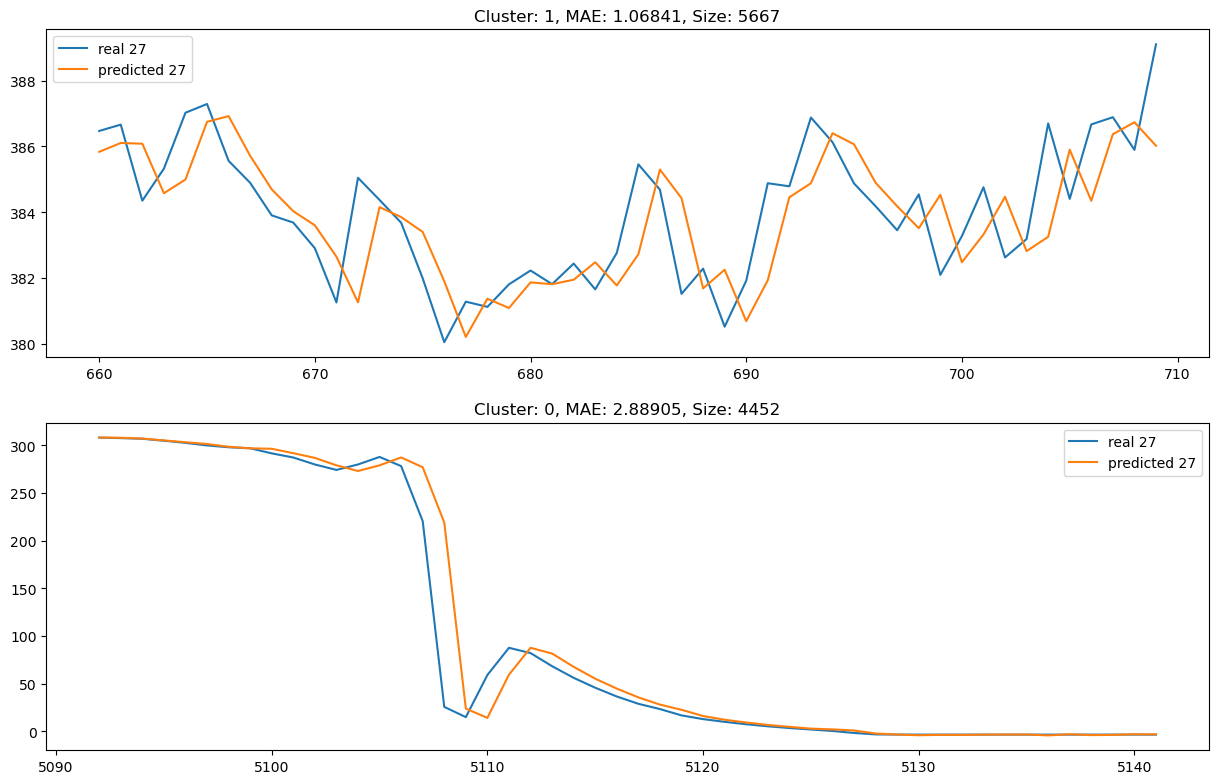

In [167]:
for i in range(min(TOP, len(top))):
    #print(int(f"{i+1}1{TOP}"))
    plt.subplot(int(f"{TOP}1{i+1}"))
    index = AE["cluster_num"] == top[i]
    plt.title(f"Cluster: {top[i]}, MAE: {AE[index]['AE'].mean():.5f}, Size: {sum(AE['cluster_num'] == top[i])}")
    cluster = data[[f"real {VAR}", f"predicted {VAR}"]][index]
    print(cluster.shape)
    # find continous index
    print(cluster.index.shape)
    cont = np.split(cluster, np.where(np.diff(cluster.index) > 1)[0] + 1)
    print([len(x) for x in cont])
    ind = np.argmax([len(x) for x in cont])
#     chunk = [x for x in cont if len(x) > LEN][-1]
    chunk = cont[ind]
    start = LEN * 0 // 5
    plt.plot(chunk[start:start+5*LEN])
    plt.legend(chunk.columns)
    
plt.gcf().set_size_inches(15, 5 * TOP)
# plt.savefig("top_clusters_visualize.png")
plt.show()